In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

In [2]:
def plot (X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=5)
    plt.show()


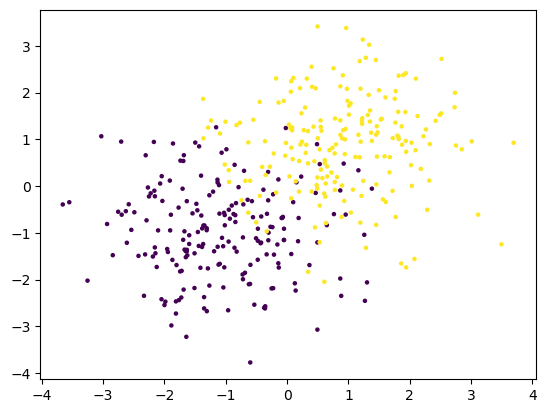

In [3]:
# sample dataset provided by chatGPT
np.random.seed(0)
num_samples = 200

# Class 0 data
x0 = np.random.normal(loc=[-1, -1], scale=[1, 1], size=(num_samples, 2))
y0 = np.zeros(num_samples)

# Class 1 data
x1 = np.random.normal(loc=[1, 1], scale=[1, 1], size=(num_samples, 2))
y1 = np.ones(num_samples)

# Concatenate data
X_train = np.concatenate([x0, x1])
y_train = np.concatenate([y0, y1])

plot(X_train, y_train)

In [4]:
def model(w, x, b):
    z  = np.dot(w, x.T) + b
    return(1 / (1 + np.exp(-z)))

In [5]:
def cost(w, x, b, y, m):
    f_wb = model(w, x, b)
    j = -(np.dot(y, np.log(f_wb)) + np.dot((1 - y), np.log(1 - f_wb))) / m
    return j


In [33]:
def gradient_descent(x, y):
    w = np.zeros(x[0].shape)
    b = 0
    alpha = 0.1
    j = []
    m = len(x)
    for i in range (1000):
        f_wb = model(w, x, b)
        d_w = np.dot((f_wb - y), x) / m
        d_b = np.sum(f_wb - y) / m
        w = w - alpha * d_w
        b = b - alpha * d_b
        j.append(cost(w, x, b, y, m))
    plot_regression(j)
    return (w, b)

In [34]:
def plot_regression(y):
    x_ = np.arange(1, len(y) + 1)  # Generate x-axis values as the range of iterations
    plt.plot(x_, y)
    plt.xlabel("No. of iteration")
    plt.ylabel("Cost")
    plt.show()

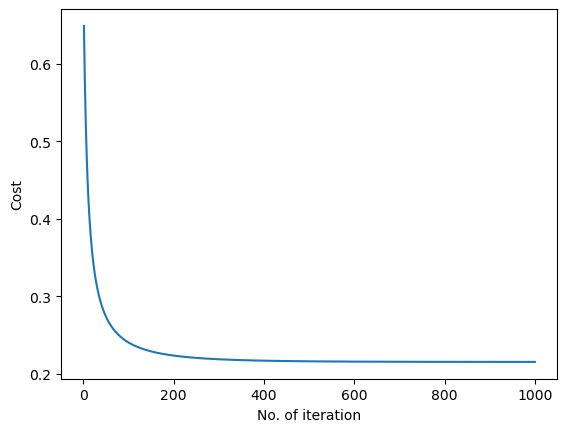

(array([1.90707489, 1.85013346]), 0.37407528586272165)

In [35]:
gradient_descent(X_train, y_train)

In [36]:
def decision_boundary(w, x, y, b, mod):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    x_ = np.hstack((x, y))
    if mod == True:
        x_ = feature_sq(x_)
    return np.dot(w, x_.T) + b

In [37]:
def plot_db(w, b, X, Y, mod=False):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=5)
    x = np.linspace(-4, 4, 100)
    y = np.linspace(-4, 4, 100)
    X_, Y_ = np.meshgrid(x, y)

    # Evaluate the implicit function at each point in the grid
    Z = decision_boundary(w, X_.flatten(), Y_.flatten(), b, mod)
    Z = Z.reshape(X_.shape)

    # Plot the contour of the implicit function
    plt.contour(X_, Y_, Z, levels=[0], colors='red')

    # Display the plot
    plt.show()

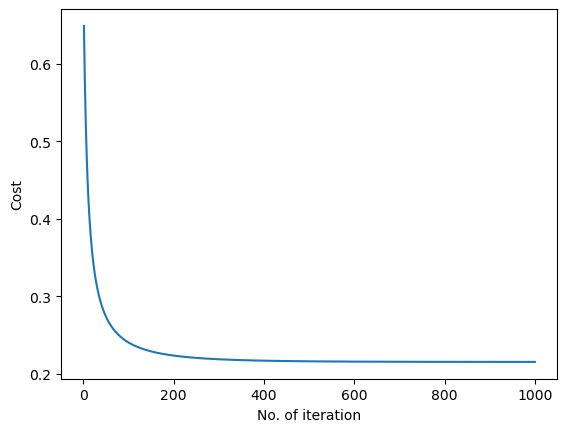

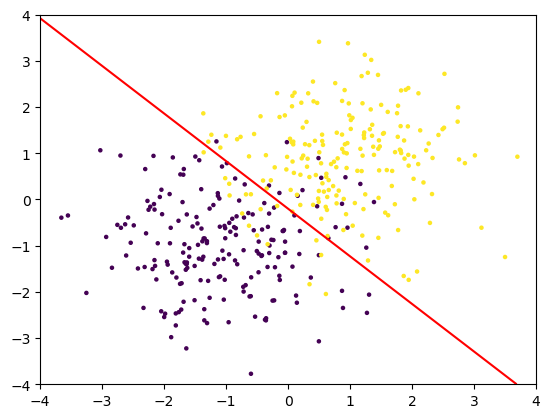

In [38]:
w, b = gradient_descent(X_train, y_train)
plot_db(w, b, X_train, y_train)

In [39]:
def feature_sq(X) :
    X_new = np.hstack((X, X**2))
    col = X[:, 0]*X[:, 1]
    X_new = np.hstack((X_new, col.reshape(-1, 1)))
    return X_new

In [40]:
print(feature_sq(X_train))

[[ 7.64052346e-01 -5.99842792e-01  5.83775987e-01  3.59811375e-01
  -4.58311292e-01]
 [-2.12620159e-02  1.24089320e+00  4.52073320e-04  1.53981593e+00
  -2.63838909e-02]
 [ 8.67557990e-01 -1.97727788e+00  7.52656866e-01  3.90962781e+00
  -1.71540322e+00]
 ...
 [ 1.41027612e-01  1.01057844e-01  1.98887872e-02  1.02126877e-02
   1.42519463e-02]
 [ 1.07458641e+00 -7.70990694e-02  1.15473595e+00  5.94426650e-03
  -8.28496119e-02]
 [ 5.75336698e-01  1.70035402e-01  3.31012316e-01  2.89120381e-02
   9.78276069e-02]]


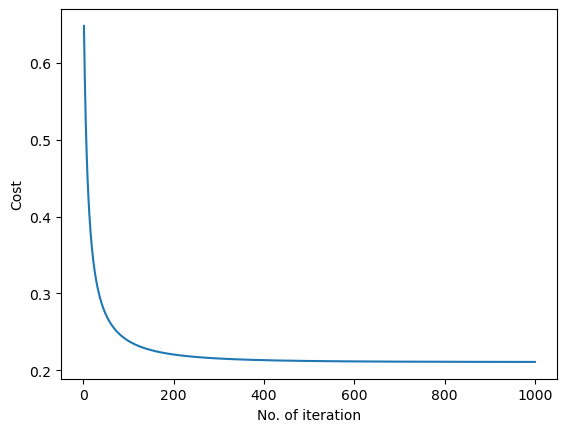

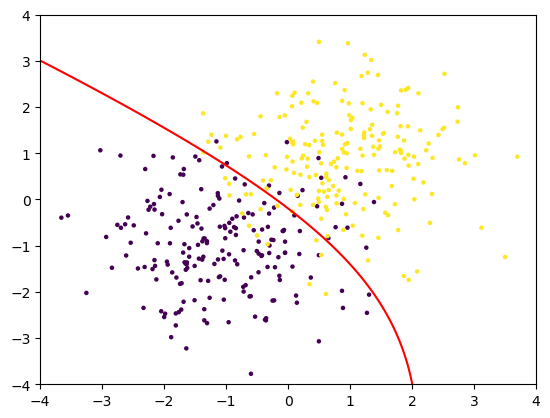

In [42]:
X_mod = feature_sq(X_train)
w, b = gradient_descent(X_mod, y_train)
plot_db(w, b, X_train, y_train, True)